<a href="https://colab.research.google.com/github/panaitealexandra/PMP-2024/blob/main/LAB6_PMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercitiu

Calculam rata observata a apelurilor per ora $λ$ pe baza datelor.
Determinam distributia a priori pentru $λ$, folosind o distributie Gamma cu parametrii
$α$ și $β$, ca fiind conjugata a distributiei Poisson.
Calculam distributia a posteriori pentru $λ$, folosind distributia Poisson pentru datele observate și distributia Gamma a priori.
Determinam intervalul HDI (Highest Density Interval) de 94% pentru distributia a posteriori.
Calculam valoarea maxima a probabilitatii pentru $λ$ (modulul distributiei a posteriori).

Rata observata de apeluri pe ora: 18.00
Parametrii a posteriori pentru distributia Gamma: α = 182, β = 10.055555555555555
Intervalul HDI de 94% pentru λ: [15.63008946 20.6653975 ]
Valoarea cea mai probabila pentru λ (modulul distributiei a posteriori): 18.00


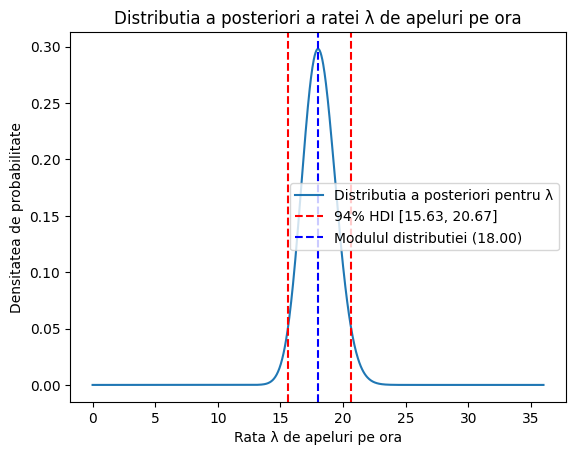

In [3]:
import numpy as np
import scipy.stats as stats
import arviz as az
import matplotlib.pyplot as plt

num_apeluri = 180
timp_observare = 10
rata_observata = num_apeluri / timp_observare

alpha_prior = 2
beta_prior = 1 / rata_observata

alpha_posterior = alpha_prior + num_apeluri
beta_posterior = beta_prior + timp_observare

posterior_dist = stats.gamma(alpha_posterior, scale=1 / beta_posterior)

hdi_94 = az.hdi(posterior_dist.rvs(10000), hdi_prob=0.94)

mode_lambda = (alpha_posterior - 1) / beta_posterior

print(f"Rata observata de apeluri pe ora: {rata_observata:.2f}")
print(f"Parametrii a posteriori pentru distributia Gamma: α = {alpha_posterior}, β = {beta_posterior}")
print(f"Intervalul HDI de 94% pentru λ: {hdi_94}")
print(f"Valoarea cea mai probabila pentru λ (modulul distributiei a posteriori): {mode_lambda:.2f}")

x = np.linspace(0, 2 * mode_lambda, 1000)
y = posterior_dist.pdf(x)
plt.plot(x, y, label='Distributia a posteriori pentru λ')
plt.axvline(hdi_94[0], color='red', linestyle='--', label=f'94% HDI [{hdi_94[0]:.2f}, {hdi_94[1]:.2f}]')
plt.axvline(hdi_94[1], color='red', linestyle='--')
plt.axvline(mode_lambda, color='blue', linestyle='--', label=f'Modulul distributiei ({mode_lambda:.2f})')
plt.xlabel("Rata λ de apeluri pe ora")
plt.ylabel("Densitatea de probabilitate")
plt.legend()
plt.title("Distributia a posteriori a ratei λ de apeluri pe ora")
plt.show()
